In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
sns.set_theme(style="darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Objetivos:
    - Distancia média por mês (todas modalidades).
    - Média de tempo em movimento;
    - Agrupar por tipo.
    - Série histórica por ano.
    - Média das velocidades médias
    - Média das velocidades máximas.
    - Média das elevações(alto e baixo).
    - Agrupamento (k-means)
    - Série Temporal

In [2]:
df = pd.read_json('response.json')

In [3]:
df.head()

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,...,heartrate_opt_out,display_hide_heartrate_option,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,average_watts,kilojoules,device_watts
0,2,"{'id': 31401271, 'resource_state': 1}",Morning Run,7421.4,2382,2382,80,Run,0.0,5256094139,...,False,False,33,1,4,0,False,NaN,NaN,NaN
1,2,"{'id': 31401271, 'resource_state': 1}",Morning Run,3973.0,1241,1241,52,Run,NaN,5256094097,...,False,False,41,9,1,0,False,NaN,NaN,NaN
2,2,"{'id': 31401271, 'resource_state': 1}",Morning Ride,61663.6,8168,8295,259,Ride,NaN,5222905516,...,False,False,53,-1,21,0,False,139.3,1137.7,0.0
3,2,"{'id': 31401271, 'resource_state': 1}",Morning Ride,39816.8,5566,5716,112,Ride,NaN,5222905277,...,False,False,26,-3,1,0,False,116.4,648.1,0.0
4,2,"{'id': 31401271, 'resource_state': 1}",Morning Run,4821.2,1413,1417,28,Run,NaN,5212417470,...,False,False,37,17,5,0,False,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   resource_state                 30 non-null     int64  
 1   athlete                        30 non-null     object 
 2   name                           30 non-null     object 
 3   distance                       30 non-null     float64
 4   moving_time                    30 non-null     int64  
 5   elapsed_time                   30 non-null     int64  
 6   total_elevation_gain           30 non-null     int64  
 7   type                           30 non-null     object 
 8   workout_type                   12 non-null     float64
 9   id                             30 non-null     int64  
 10  external_id                    30 non-null     object 
 11  upload_id                      30 non-null     int64  
 12  start_date                     30 non-null     objec

In [5]:
columns=['distance', 'moving_time','elapsed_time', 'type', 'start_date', 'average_speed', 'max_speed', 'elev_high', 'elev_low', 'id']

In [6]:
base= df.copy()

In [7]:
base = base[columns]

In [8]:
#distancia media bike por mes

In [9]:
def transform_data(date1):
    datee=''
    date_t = parser.parse(date1)
    datee = date_t.date()
    return str(datee)

In [10]:
base['start_date'] = base['start_date'].apply(lambda x: transform_data(x))

In [11]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       30 non-null     float64
 1   moving_time    30 non-null     int64  
 2   elapsed_time   30 non-null     int64  
 3   type           30 non-null     object 
 4   start_date     30 non-null     object 
 5   average_speed  30 non-null     float64
 6   max_speed      30 non-null     float64
 7   elev_high      30 non-null     int64  
 8   elev_low       30 non-null     int64  
 9   id             30 non-null     int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 2.5+ KB


In [12]:
base.index= pd.to_datetime(base['start_date'])

In [13]:
base=base.drop('start_date', 1)

In [14]:
base['day'] = base.index.day
base['month'] = base.index.month
base['year'] = base.index.year
base['day_of_week'] = base.index.day_of_week


In [15]:
base.head()

,distance,moving_time,elapsed_time,type,average_speed,max_speed,elev_high,elev_low,id,day,month,year,day_of_week
start_date,,,,,,,,,,,,,
2021-05-07,7421.4,2382,2382,Run,3.116,9.7,33,1,5256094139,7,5,2021,4
2021-05-05,3973.0,1241,1241,Run,3.201,5.9,41,9,5256094097,5,5,2021,2
2021-05-01,61663.6,8168,8295,Ride,7.549,15.8,53,-1,5222905516,1,5,2021,5
2021-04-30,39816.8,5566,5716,Ride,7.154,14.0,26,-3,5222905277,30,4,2021,4
2021-04-29,4821.2,1413,1417,Run,3.412,5.4,37,17,5212417470,29,4,2021,3


In [16]:
week={
    0:'monday',
    1:'tuesday',
    2:'wednesday',
    3:'thursday',
    4:'friday',
    5:'saturday',
    6:'sunday'
}

In [17]:
month_desc={
    1:'january',
    2:'february',
    3:'march',
    4:'april',
    5:'may',
    6:'june'
}

In [18]:
base['day_of_week'].replace(week, inplace=True)
base['month'].replace(month_desc, inplace=True)

In [19]:
base.head()

,distance,moving_time,elapsed_time,type,average_speed,max_speed,elev_high,elev_low,id,day,month,year,day_of_week
start_date,,,,,,,,,,,,,
2021-05-07,7421.4,2382,2382,Run,3.116,9.7,33,1,5256094139,7,may,2021,friday
2021-05-05,3973.0,1241,1241,Run,3.201,5.9,41,9,5256094097,5,may,2021,wednesday
2021-05-01,61663.6,8168,8295,Ride,7.549,15.8,53,-1,5222905516,1,may,2021,saturday
2021-04-30,39816.8,5566,5716,Ride,7.154,14.0,26,-3,5222905277,30,april,2021,friday
2021-04-29,4821.2,1413,1417,Run,3.412,5.4,37,17,5212417470,29,april,2021,thursday


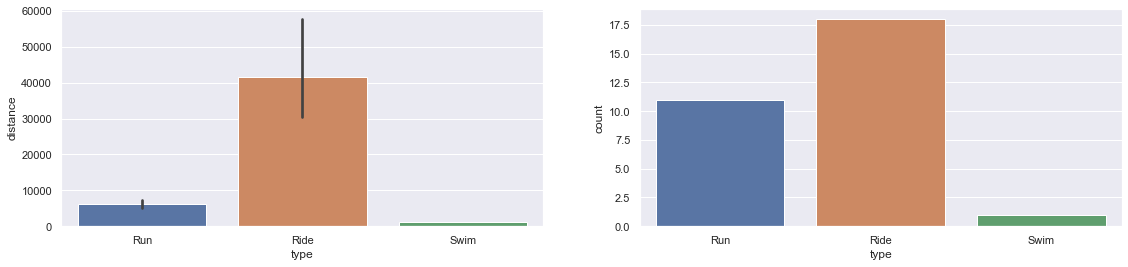

In [20]:
#distance X type and count X type
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(19,4))
sns.barplot(x='type', y='distance', data=base, ax=axis1)
sns.countplot(x='type', data=base, ax=axis2);

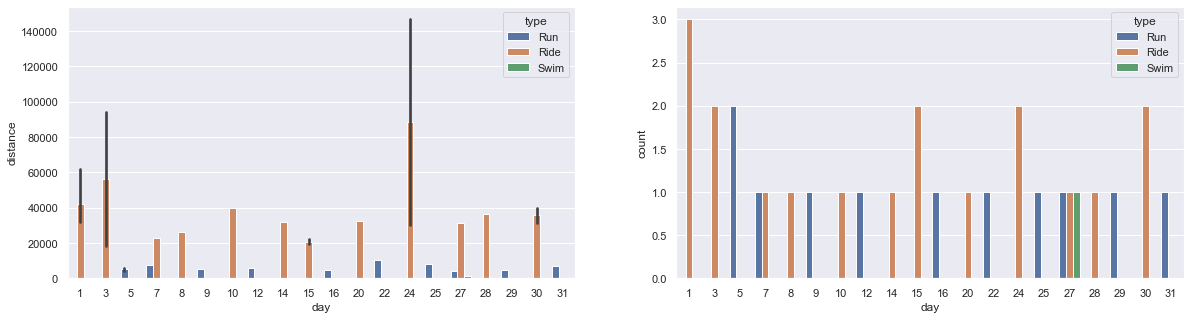

In [21]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,5))
sns.barplot(x='day', y='distance', data=base, ax=axis1, hue='type')
sns.countplot(x='day', data=base, ax=axis2, hue='type');

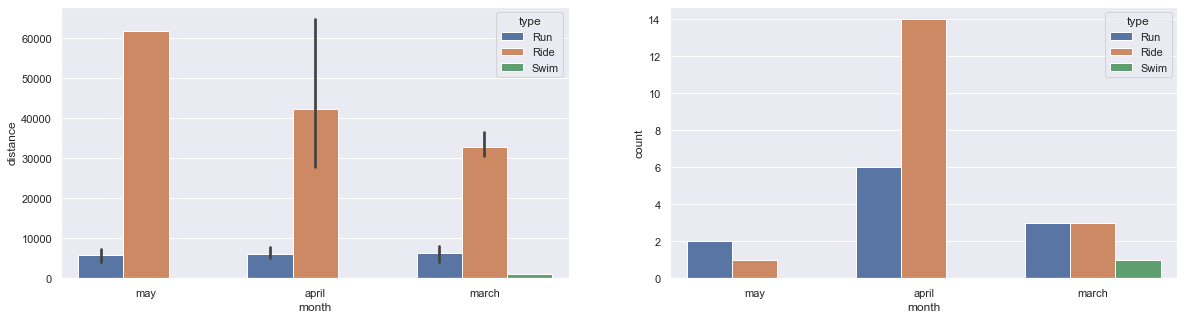

In [22]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,5))
sns.barplot(x='month', y='distance', data=base, ax=axis1, hue='type')
sns.countplot(x='month', data=base, ax=axis2, hue='type');

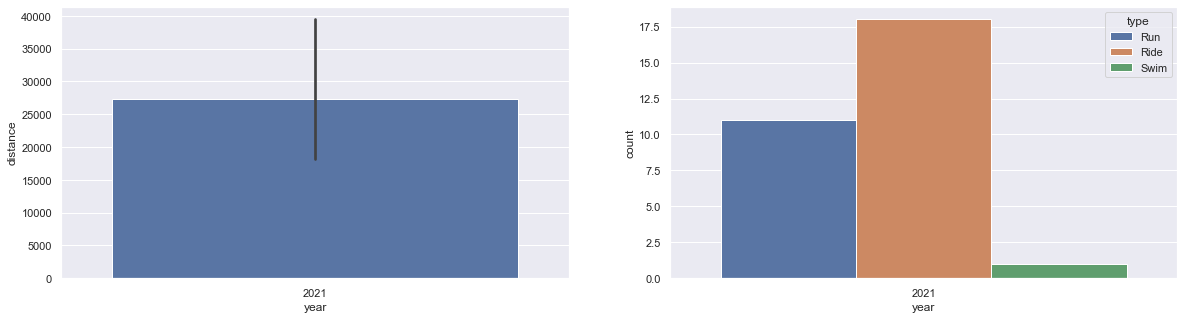

In [23]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,5))
sns.barplot(x='year', y='distance', data=base, ax=axis1)
sns.countplot(x='year', data=base, ax=axis2, hue='type');

### ----------------------------------------------
    -

In [24]:
## média tempo em movimento

In [25]:
base.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2021-05-07 to 2021-03-24
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       30 non-null     float64
 1   moving_time    30 non-null     int64  
 2   elapsed_time   30 non-null     int64  
 3   type           30 non-null     object 
 4   average_speed  30 non-null     float64
 5   max_speed      30 non-null     float64
 6   elev_high      30 non-null     int64  
 7   elev_low       30 non-null     int64  
 8   id             30 non-null     int64  
 9   day            30 non-null     int64  
 10  month          30 non-null     object 
 11  year           30 non-null     int64  
 12  day_of_week    30 non-null     object 
dtypes: float64(3), int64(7), object(3)
memory usage: 3.3+ KB


In [26]:

base.head()

,distance,moving_time,elapsed_time,type,average_speed,max_speed,elev_high,elev_low,id,day,month,year,day_of_week
start_date,,,,,,,,,,,,,
2021-05-07,7421.4,2382,2382,Run,3.116,9.7,33,1,5256094139,7,may,2021,friday
2021-05-05,3973.0,1241,1241,Run,3.201,5.9,41,9,5256094097,5,may,2021,wednesday
2021-05-01,61663.6,8168,8295,Ride,7.549,15.8,53,-1,5222905516,1,may,2021,saturday
2021-04-30,39816.8,5566,5716,Ride,7.154,14.0,26,-3,5222905277,30,april,2021,friday
2021-04-29,4821.2,1413,1417,Run,3.412,5.4,37,17,5212417470,29,april,2021,thursday


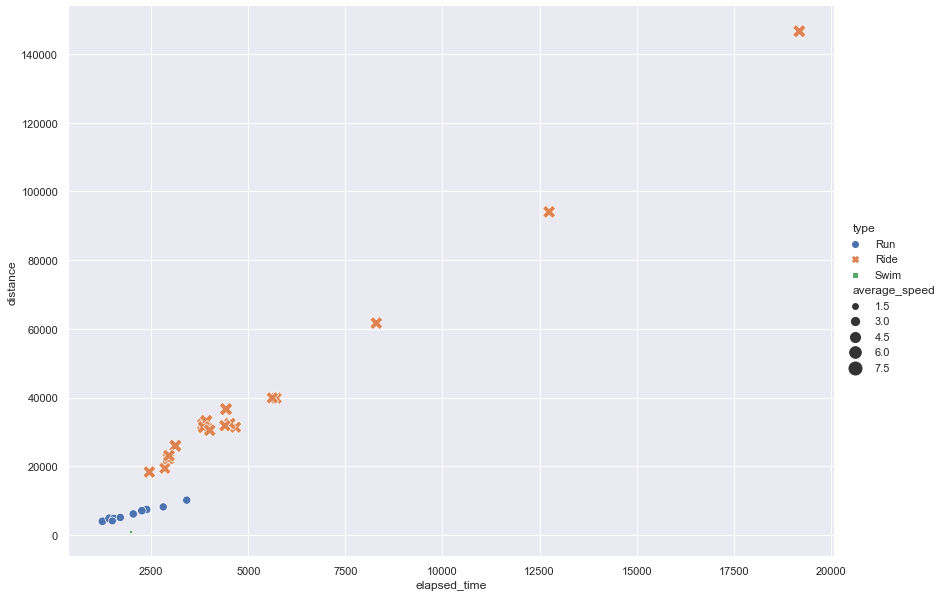

In [27]:
sns.relplot(x='elapsed_time', y='distance', hue="type", style='type', data=base, height=8.27, aspect=11.7/8.27, size='average_speed', sizes=(15, 200));


Objetivos:
- ~Distancia média por mês (todas modalidades)~
- ~Agrupar por tipo~.
- Série histórica por ano.
- Média das velocidades médias
- Média das velocidades máximas.
- Média das elevações(alto e baixo).
- Agrupamento (k-means)

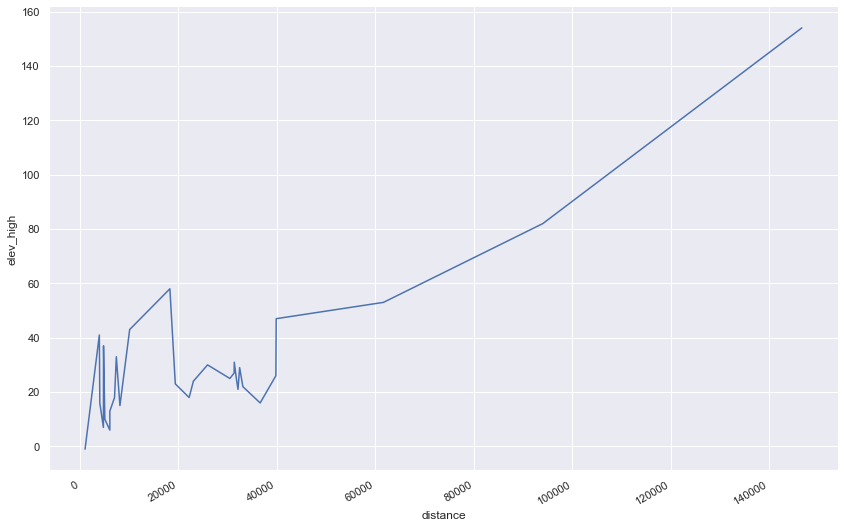

In [28]:
g = sns.relplot(x="distance", y="elev_high", kind="line", height=8.27, aspect=11.7/8.27, data=base)
g.fig.autofmt_xdate()

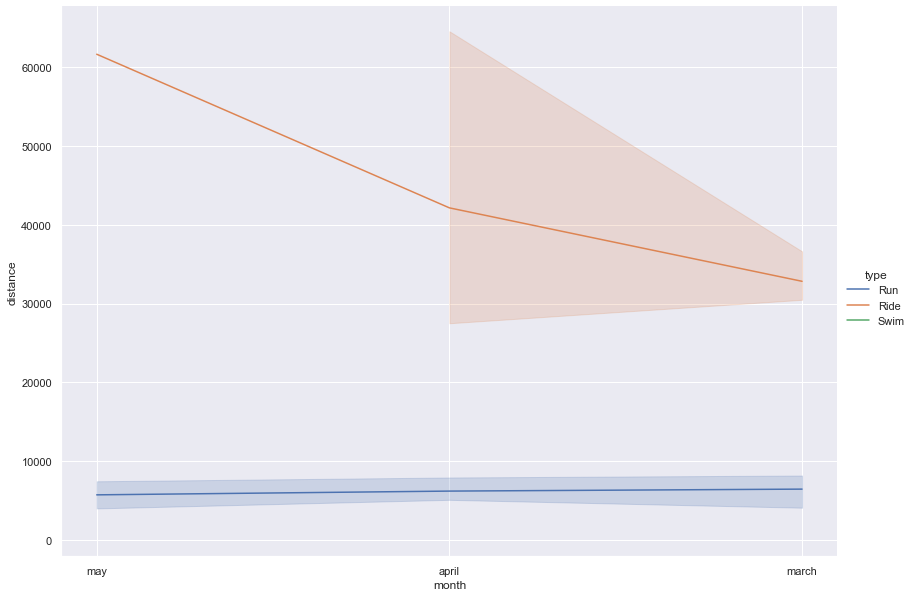

In [29]:
sns.relplot(x="month", y="distance", kind="line", hue='type' ,height=8.27, aspect=11.7/8.27,data=base);


In [30]:
###

In [31]:
base_cp=base.copy()

In [32]:
# 1 run
# 2 ride

In [33]:
X_run = base_cp.loc[base_cp['type']=='Run']

In [34]:
X_ride = base_cp.loc[base_cp['type']=='Ride']

In [35]:
X_ride=X_ride.iloc[:, [0,4]]
X_run=X_run.iloc[:, [0,4]]

In [36]:
X_run

,distance,average_speed
start_date,,
2021-05-07,7421.4,3.116
2021-05-05,3973.0,3.201
2021-04-29,4821.2,3.412
2021-04-22,10128.9,2.968
2021-04-16,4798.3,3.124
2021-04-12,6101.6,3.102
2021-04-09,5086.4,2.994
2021-04-05,6107.2,3.006
2021-03-31,7058.6,3.146


In [37]:
X_ride

,distance,average_speed
start_date,,
2021-05-01,61663.6,7.549
2021-04-30,39816.8,7.154
2021-04-27,31340.1,7.086
2021-04-24,146620.0,8.062
2021-04-20,32460.5,7.223
2021-04-15,19396.2,6.980
2021-04-15,22206.4,7.642
2021-04-14,31791.7,7.282
2021-04-10,39884.2,7.145


In [38]:

scaler = StandardScaler()

In [39]:
X_run= scaler.fit_transform(X_run)
X_ride=scaler.fit_transform(X_ride)

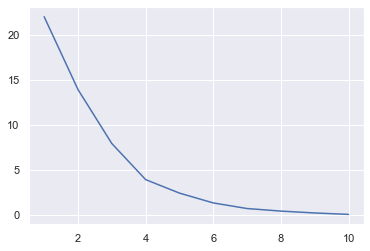

In [40]:
wcss = []
for i in range(1, 11):
    run_kmeans = KMeans(n_clusters = i, random_state = 0)
    run_kmeans.fit(X_run)
    wcss.append(run_kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.show()

In [41]:
run_kmeans = KMeans(n_clusters = 4, random_state = 0)
y_run_pred = run_kmeans.fit_predict(X_run)

In [42]:
center=run_kmeans.cluster_centers_
labels=run_kmeans.labels_

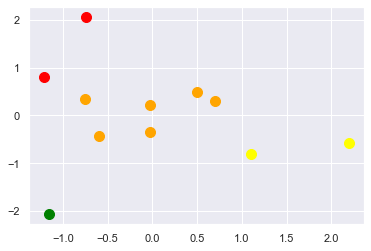

In [43]:
plt.scatter(X_run[y_run_pred == 0, 0], X_run[y_run_pred == 0, 1], s = 100, c = "red", label = "Cluster 1")
plt.scatter(X_run[y_run_pred == 1, 0], X_run[y_run_pred == 1, 1], s = 100, c = "orange", label = "Cluster 2")
plt.scatter(X_run[y_run_pred == 2, 0], X_run[y_run_pred == 2, 1], s = 100, c = "green", label = "Cluster 3")
plt.scatter(X_run[y_run_pred == 3, 0], X_run[y_run_pred == 3, 1], s = 100, c = "yellow", label = "Cluster 4")

plt.savefig('X_run_two_variables.png')


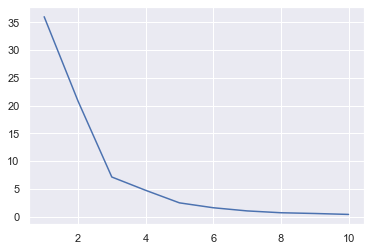

In [44]:
wcss = []
for i in range(1, 11):
    ride_kmeans = KMeans(n_clusters = i, random_state = 0)
    ride_kmeans.fit(X_ride)
    wcss.append(ride_kmeans.inertia_)
plt.plot(range(1, 11), wcss)

In [45]:
ride_kmeans = KMeans(n_clusters = 4, random_state = 0)
y_ride_pred = ride_kmeans.fit_predict(X_ride)

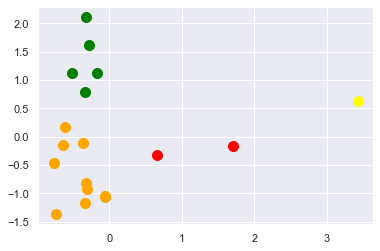

In [46]:
plt.scatter(X_ride[y_ride_pred == 0, 0], X_ride[y_ride_pred == 0, 1], s = 100, c = "red", label = "Cluster 1")
plt.scatter(X_ride[y_ride_pred == 1, 0], X_ride[y_ride_pred == 1, 1], s = 100, c = "orange", label = "Cluster 2")
plt.scatter(X_ride[y_ride_pred == 2, 0], X_ride[y_ride_pred == 2, 1], s = 100, c = "green", label = "Cluster 3")
plt.scatter(X_ride[y_ride_pred == 3, 0], X_ride[y_ride_pred == 3, 1], s = 100, c = "yellow", label = "Cluster 4")
plt.savefig('X_ride_two_variables.png')
